<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2021/blob/main/Week03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Classification

**Reference: Chapter 3**

Last week we explored a regression task using primarily our own observation of the data. This week let's look at a classification task, and see how existing machine learning techniques can be applied to solve it.

## Classifying Points on the Plane

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load the data set

In [2]:
url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt"
# Open the url in web brower and learn its raw format

# Load to Python as a data frame
raw_data = pd.read_csv(url, sep=',')

# Display first 5 rows
raw_data.head()

,x1,x2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


### 2. Data Exploration

In [3]:
# Show the size of the data set
raw_data.shape

(200, 3)

In [4]:
# Show the data type of each column
raw_data.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [5]:
# Is there any missing values?
raw_data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [6]:
# Example: A data frame with missing values
temp = pd.DataFrame({
    "Midterm": [100, 90, 80],
    "Final": [80, 90, 100],
    "Grade": ['A', np.nan, 'A']
})
temp

,Midterm,Final,Grade
0,100,80,A
1,90,90,NaN
2,80,100,A


In [7]:
temp.isnull().sum()

Midterm    0
Final      0
Grade      1
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef1fd46518>,
      dtype=object)

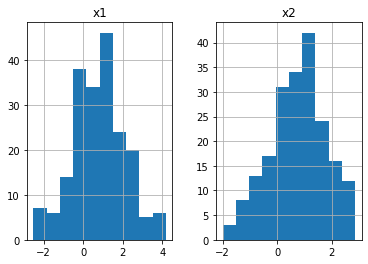

In [8]:
# plot the distribution as histograms
numeric_cols = ['x1', 'x2']
raw_data[numeric_cols].hist()

In [9]:
# x1, x2 are numeric values. What is the distribution of values?

raw_data[numeric_cols].describe()

,x1,x2
count,200.000000,200.000000
mean,0.784672,0.756016
std,1.297582,1.026442
min,-2.520820,-1.999853
25%,-0.071465,0.095555
50%,0.859702,0.861387
75%,1.543438,1.435275
max,4.170746,2.855805


In [10]:
# Examine the labels:
raw_data['y'].value_counts()

1    100
0    100
Name: y, dtype: int64

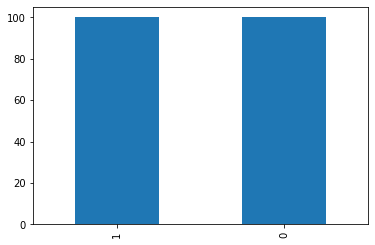

In [12]:
raw_data['y'].value_counts().plot.bar()

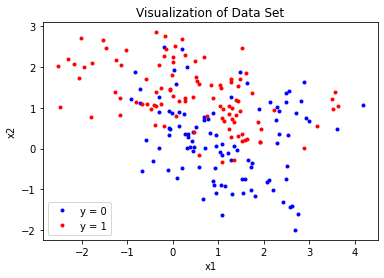

In [18]:
# Plot data as points on a 2D plane
blue_pts = raw_data[raw_data['y'] == 0]
red_pts = raw_data[raw_data['y'] == 1]
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b.', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r.', label='y = 1')
plt.title('Visualization of Data Set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.savefig('Week3Fig.png')

### 3. Build a Classification Model
The `sklearn` package provides implementations of many existing machine elarning techniques. Today we are going to apply **support vector machine (SVM)** and **k-nearest-neighbors** method to build two different classification models.

### Attempt 1: Linear SVM

![Illustration of SVM](https://data-flair.training/blogs/wp-content/uploads/sites/2/2019/07/introduction-to-SVM.png)

In [19]:
# SVM model
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
input_cols = ['x1', 'x2']
model_svm.fit(raw_data[input_cols], raw_data['y'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [20]:
# Predict the class of point(-2, 2) and (3, -1)
test_data = pd.DataFrame({
    'x1': [-2, 3],
    'x2': [2, -1]
})
test_data

,x1,x2
0,-2,2
1,3,-1


In [21]:
predictions = model_svm.predict(test_data[['x1', 'x2']])
print(predictions)

[1 0]


In [23]:
# Visualize the decision region
plot_data = pd.DataFrame()
x1_coordinates = np.linspace(-3, 4, 100) # sample 100 points per row
x2_coordinates = np.linspace(-2, 3, 100) # sample 100 rows (total: 100 * 100 = 10,000 points)
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        plot_data = plot_data.append({'x1': x1,
                               'x2': x2},
                              ignore_index=True)
plot_data

,x1,x2
0,-3.0,-2.000000
1,-3.0,-1.949495
2,-3.0,-1.898990
3,-3.0,-1.848485
4,-3.0,-1.797980
...,...,...
9995,4.0,2.797980
9996,4.0,2.848485
9997,4.0,2.898990
9998,4.0,2.949495


In [24]:
plot_data['prediction'] = model_svm.predict(plot_data[['x1', 'x2']])
plot_data.head()

,x1,x2,prediction
0,-3.0,-2.000000,0
1,-3.0,-1.949495,0
2,-3.0,-1.898990,0
3,-3.0,-1.848485,0
4,-3.0,-1.797980,0


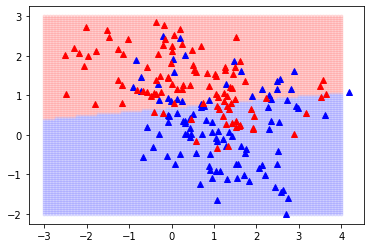

In [25]:
test_data_blue = plot_data[plot_data['prediction'] == 0]
test_data_red = plot_data[plot_data['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

**Discussion:** How to evaluate this model?

In [ ]:
# Split the data set into training set (80%) and test set (20%), 
# and build a SVM model on the new training set
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(raw_data, test_size=0.2)

In [ ]:
# Display the shape of training set



In [ ]:
# Display the shape of test set



In [ ]:
# Use the training set to train a SVM classifier.



In [ ]:
# Apply this model to make predictions on the test set.



In [ ]:
# Calculate the classification error on the test set
from sklearn.metrics import accuracy_score
accuracy_score(test_data['y'], test_data['prediction'])

### Attempt 2:  3-Nearest-Neighbor
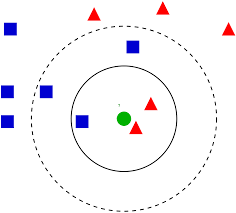

In [ ]:
# kNN model
from sklearn.neighbors import KNeighborsClassifier
model_3nn = KNeighborsClassifier(n_neighbors=3)
model_3nn.fit(raw_data[['x1', 'x2']], raw_data['y'])

In [ ]:
# How to evaluate the kNN model?

